In [ ]:
# import tensorflow as tf

# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# if tf.config.list_physical_devices('GPU'):
#     print("TensorFlow is using GPU.")
# else:
#     print("TensorFlow is not using GPU.")

Dataset ditemukan!


### Install Dependency

In [ ]:
# %pip install tensorflow
# %pip install keras_tuner
# %pip install streamlit
# %pip install matplotlib

### Import Semua Package

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

### Memuat Model MobileNetV2

Memuat model MobileNetV2 yang telah dilatih di dataset ImageNet. `include_top=False` memastikan bahwa lapisan klasifikasi teratas tidak disertakan, karena kita akan menggantinya dengan lapisan klasifikasi kita sendiri untuk dataset tekstur. `input_tensor` mendefinisikan bentuk input (ukuran gambar) yang diharapkan oleh model.

In [3]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input

# Define the image size
img_size = (224, 224) # Assuming your image size is 128x128, adjust if needed

# Load the MobileNetV2 model with pre-trained ImageNet weights
# Exclude the top classification layer
base_model = MobileNetV2(weights='imagenet',
                         include_top=False,
                         input_tensor=Input(shape=(img_size[0], img_size[1], 3)))

# Display the model summary to see the layers
base_model.summary()

/tmp/ipykernel_881/64191072.py:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet',
I0000 00:00:1750393879.731668     881 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3620 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 6GB Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

### Memuat Dataset dan Membagi Dataset Training dan Validation (80/20)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path

# Define the path to your main dataset directory
dataset_dir = Path('/mnt/g/My Drive/college/Smt4/PCP/DatasetTekstur')

# Create data generators with validation_split and more aggressive augmentation for training
# Rescale images and split 80% for training, 20% for validation
datagen_train = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.20,
    rotation_range=20,
    horizontal_flip=True
)

# The validation data should NOT be augmented, only rescaled and split
datagen_val = ImageDataGenerator(rescale=1./255, validation_split=0.20)


train_data = datagen_train.flow_from_directory(
    dataset_dir,
    target_size=img_size, # Use the img_size defined earlier
    batch_size=32,
    class_mode='categorical', # Or 'binary' if you have only two classes
    subset='training' # Specify this is the training subset
)

val_data = datagen_val.flow_from_directory(
    dataset_dir,
    target_size=img_size, # Use the img_size defined earlier
    batch_size=32,
    class_mode='categorical', # Or 'binary' if you have only two classes
    subset='validation' # Specify this is the validation subset
)

# Now train_data and val_data are defined and can be used in subsequent cells

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


### Menambahkan Lapisan Klasifikasi Baru

Sel ini membangun model Sequential dengan menambahkan lapisan klasifikasi baru di atas model dasar MobileNetV2 yang sudah dimuat. `GlobalAveragePooling2D` mengurangi dimensi output dari model dasar, dan lapisan `Dense` digunakan untuk klasifikasi akhir ke dalam jumlah kelas tekstur yang Anda miliki.

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Add new classification layers on top of the base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'), # You can adjust the number of units
    Dense(train_data.num_classes, activation='softmax')
])

# Display the model summary to see the new layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 2,388,227 (9.11 MB)

 Non-trainable params: 34,112 (133.25 KB)

### Membekukan Lapisan Model Dasar

Sel ini membekukan lapisan-lapisan pada model dasar MobileNetV2 (`base_model`). Ini berarti bobot pada lapisan-lapisan ini tidak akan diperbarui selama fase pelatihan awal. Model kemudian dikompilasi dengan optimizer 'adam'. Pembekuan lapisan pre-trained membantu memanfaatkan fitur yang sudah dipelajari tanpa merusaknya di awal pelatihan.

In [13]:
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model after freezing the layers
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary again to see the number of trainable parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

### Melatih Model dengan Lapisan Dasar Dibekukan

Sel ini melatih model menggunakan data pelatihan (`train_data`) dan memvalidasinya menggunakan data validasi (`val_data`). Karena lapisan model dasar dibekukan, hanya lapisan klasifikasi yang baru ditambahkan yang akan dilatih di sini. Plot akurasi dan loss ditampilkan setelah pelatihan untuk memantau kinerja.

/home/creez/miniconda3/envs/tf-219/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1750394361.939881    1247 service.cc:152] XLA service 0x7fbaa4003940 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750394361.939930    1247 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2025-06-20 12:39:22.058389: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1750394364.067116    1247 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-06-20 12:39:25.027018: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4103', 204 bytes spill stores, 204 bytes spill loads

2025-06-20 12:39:25.038744: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm

1/8 ━━━━━━━━━━━━━━━━━━━━ 1:45 15s/step - accuracy: 0.3125 - loss: 1.3820

I0000 00:00:1750394373.420715    1247 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/8 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5978 - loss: 0.9384  

2025-06-20 12:39:41.050955: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4103', 4 bytes spill stores, 4 bytes spill loads

2025-06-20 12:39:41.396161: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4103_0', 200 bytes spill stores, 536 bytes spill loads

2025-06-20 12:39:41.560553: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4103', 116 bytes spill stores, 116 bytes spill loads

2025-06-20 12:39:42.074167: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4103', 5616 bytes spill stores, 5612 bytes spill loads

2025-06-20 12:39:42.380902: I ex

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6220 - loss: 0.8933

/home/creez/miniconda3/envs/tf-219/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-06-20 12:39:54.601332: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1202', 4 bytes spill stores, 4 bytes spill loads

2025-06-20 12:39:54.903533: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1195', 220 bytes spill stores, 220 bytes spill loads

2025-06-20 12:39:55.018776: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Reg

8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.6409 - loss: 0.8582 - val_accuracy: 0.9667 - val_loss: 0.1668
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9679 - loss: 0.1160 - val_accuracy: 1.0000 - val_loss: 0.0579
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9944 - loss: 0.0421 - val_accuracy: 0.9833 - val_loss: 0.0470
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9957 - loss: 0.0197 - val_accuracy: 0.9667 - val_loss: 0.0422
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9888 - loss: 0.0391 - val_accuracy: 1.0000 - val_loss: 0.0373
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9934 - loss: 0.0215 - val_accuracy: 1.0000 - val_loss: 0.0204
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9985 - loss: 0.0088 - val_accuracy: 1.0000 - val_loss: 0.0300
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9899 - loss: 0.0341 - val_accuracy: 0.9667 - val_loss: 0.0735
Epoch 9/10
8/8 ━━━━

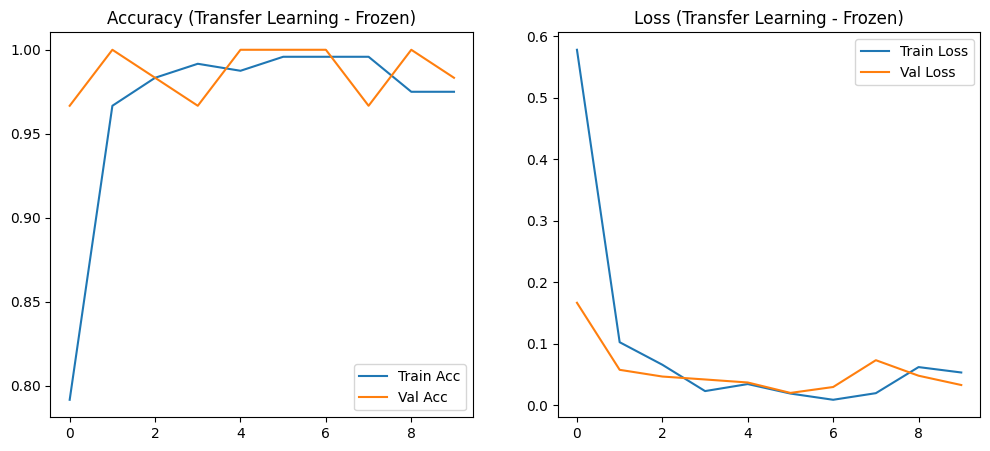

In [14]:
# Train the model with the frozen base
history_transfer = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10 # Start with a few epochs
)

# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_transfer.history['accuracy'], label='Train Acc')
plt.plot(history_transfer.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy (Transfer Learning - Frozen)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_transfer.history['loss'], label='Train Loss')
plt.plot(history_transfer.history['val_loss'], label='Val Loss')
plt.title('Loss (Transfer Learning - Frozen)')
plt.legend()
plt.show()

### Melakukan Fine-tuning pada Model

Sel ini membuka beberapa lapisan terakhir dari model dasar MobileNetV2 (`base_model`) untuk fine-tuning. Ini memungkinkan bobot pada lapisan-lapisan tersebut diperbarui bersama dengan lapisan klasifikasi baru, menyesuaikan fitur pre-trained lebih lanjut dengan dataset tekstur Anda. Model kemudian dikompilasi ulang dengan learning rate yang lebih rendah (`1e-5`) untuk penyesuaian yang lebih halus.

In [15]:
# Unfreeze some layers of the base model for fine-tuning
# It's common to unfreeze the later layers as they are more task-specific
for layer in base_model.layers[-40:]: # You can adjust this number
    layer.trainable = True

# Recompile the model with a lower learning rate
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-5), # Use a lower learning rate for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary again to see the number of trainable parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 1,845,891 (7.04 MB)

 Non-trainable params: 576,448 (2.20 MB)

### Mengevaluasi Model Setelah Fine-tuning

Sel ini mengevaluasi kinerja model yang telah di-fine-tune pada data validasi. Ini memberikan metrik akhir seperti loss dan akurasi pada data yang belum pernah dilihat selama pelatihan, menunjukkan seberapa baik model yang telah disesuaikan dapat menggeneralisasi.

In [16]:
# Evaluate the fine-tuned model on the validation data
loss, accuracy = model.evaluate(val_data)

print(f"Validation Loss after fine-tuning: {loss}")
print(f"Validation Accuracy after fine-tuning: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9889 - loss: 0.0338
Validation Loss after fine-tuning: 0.03320441395044327
Validation Accuracy after fine-tuning: 0.9833333492279053


### Hyperparameter Tuning dengan Keras Tuner

Sel ini mendefinisikan fungsi `build_model` yang membuat model dengan hyperparameter yang dapat disetel (jumlah unit di lapisan Dense, dropout rate, dan optimizer dengan learning rate-nya). Kemudian, ini menginisialisasi `RandomSearch` tuner dari Keras Tuner untuk mencari kombinasi hyperparameter terbaik berdasarkan akurasi validasi. Hasil hyperparameter terbaik akan dicetak.

In [18]:
# Define the model building function for Keras Tuner
import keras_tuner as kt
from tensorflow.keras import regularizers # Import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.applications import MobileNetV2
import tensorflow as tf

# Re-define img_size if it's not globally available in this context
img_size = (224, 224) # Make sure this matches the size used for data loading

# Load the MobileNetV2 model with pre-trained ImageNet weights
# Exclude the top classification layer
# Ensure input_tensor is defined correctly here
base_model = MobileNetV2(weights='imagenet',
                         include_top=False,
                         input_tensor=Input(shape=(img_size[0], img_size[1], 3)))


def build_model(hp):
    # Freeze the layers of the base model inside the build function
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model, # Use the pre-trained base model
        GlobalAveragePooling2D(),
        Dense(units=hp.Int('units', min_value=32, max_value=256, step=32), # Reduced max_value
              activation='relu',
              kernel_regularizer=regularizers.l2(hp.Float('l2_lambda', min_value=1e-6, max_value=1e-3, sampling='LOG')) # Adjusted range for L2 regularization
              ),
        Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)), # Adjusted range for dropout
        Dense(train_data.num_classes, activation='softmax')
    ])

    hp_optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])
    if hp_optimizer == 'adam':
        optimizer = Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-3, sampling='LOG')) # Adjusted range
    else:
         optimizer = tf.keras.optimizers.SGD(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-3, sampling='LOG')) # Adjusted range


    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Initialize the tuner
# Use a NEW directory name for a fresh search
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=15, # Increased number of hyperparameter combinations to try
    executions_per_trial=1, # Number of models to train per trial
    directory='hypertune1', # Use a NEW directory name for a fresh search
    project_name='tune'
)

# Run the hyperparameter search again with the updated build_model function
# Increased epochs for better search
tuner.search(train_data, epochs=15, validation_data=val_data)

# Get the optimal hyperparameters from the new tuner run
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of units in the dense layer is {best_hps.get('units')}.
The optimal dropout rate is {best_hps.get('dropout')}.
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
The optimal optimizer is {best_hps.get('optimizer')}.
The optimal L2 regularization lambda is {best_hps.get('l2_lambda')}.
""")

Trial 15 Complete [00h 03m 26s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 52m 21s

The optimal number of units in the dense layer is 224.
The optimal dropout rate is 0.30000000000000004.
The optimal learning rate for the optimizer is 0.0006857612343716451.
The optimal optimizer is adam.
The optimal L2 regularization lambda is 9.5229254348615e-05.



### Melatih Model dengan Hyperparameter Terbaik

Sel ini membangun kembali model menggunakan hyperparameter terbaik yang ditemukan oleh Keras Tuner. Kemudian, model ini dilatih menggunakan data pelatihan dan validasi. Plot akurasi dan loss ditampilkan setelah pelatihan untuk menunjukkan kinerja model yang telah diatur.

Epoch 1/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.5355 - loss: 1.1667 - val_accuracy: 0.8667 - val_loss: 0.3557
Epoch 2/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8994 - loss: 0.2726 - val_accuracy: 0.9833 - val_loss: 0.1473
Epoch 3/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9435 - loss: 0.1949 - val_accuracy: 1.0000 - val_loss: 0.0844
Epoch 4/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9605 - loss: 0.1204 - val_accuracy: 1.0000 - val_loss: 0.0655
Epoch 5/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9764 - loss: 0.0942 - val_accuracy: 1.0000 - val_loss: 0.0554
Epoch 6/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9860 - loss: 0.0884 - val_accuracy: 1.0000 - val_loss: 0.0575
Epoch 7/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9709 - loss: 0.0987 - val_accuracy: 1.0000 - val_loss: 0.0671


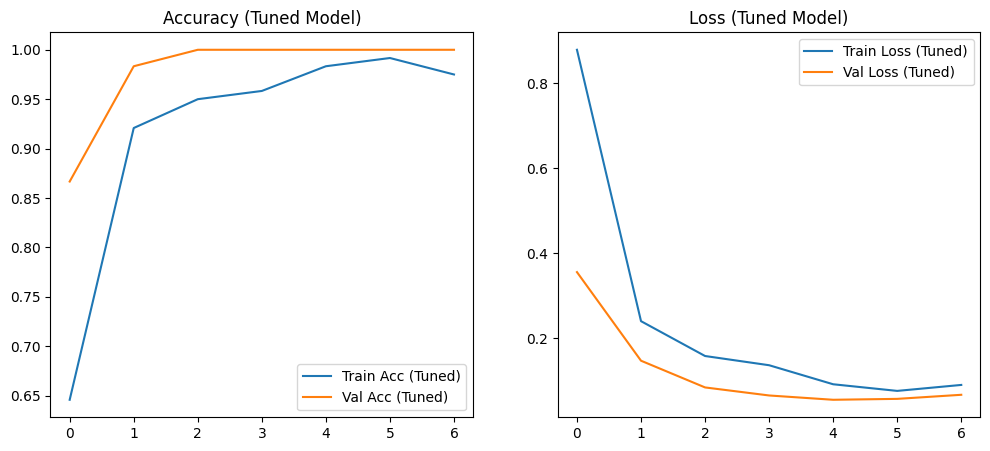

In [19]:
# Build the model with the best hyperparameters
best_model = build_model(best_hps)

# Train the model with the best hyperparameters
history_tuned = best_model.fit(
    train_data,
    validation_data=val_data,
    epochs=7 # Reduced number of epochs for final training
)

# Plot accuracy and loss for the tuned model
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_tuned.history['accuracy'], label='Train Acc (Tuned)')
plt.plot(history_tuned.history['val_accuracy'], label='Val Acc (Tuned)')
plt.title('Accuracy (Tuned Model)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_tuned.history['loss'], label='Train Loss (Tuned)')
plt.plot(history_tuned.history['val_loss'], label='Val Loss (Tuned)')
plt.title('Loss (Tuned Model)')
plt.legend()
plt.show()

### Menganalisis Misklasifikasi

Sel ini menganalisis gambar-gambar yang salah diklasifikasikan oleh model pada data validasi. Ini menghitung jumlah total gambar yang salah diklasifikasikan dan mencetak informasinya. Kode yang dikomentari menyediakan contoh cara melihat detail misklasifikasi atau bahkan menampilkan gambar-gambar yang salah diklasifikasikan.

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 597ms/step
Number of misclassified images: 32
Image: /mnt/g/My Drive/college/Smt4/PCP/DatasetTekstur/kayu/15.jpg, True Label: batu, Predicted Label: kayu
Image: /mnt/g/My Drive/college/Smt4/PCP/DatasetTekstur/kain/17.jpg, True Label: batu, Predicted Label: kain
Image: /mnt/g/My Drive/college/Smt4/PCP/DatasetTekstur/kain/13.jpg, True Label: batu, Predicted Label: kain
Image: /mnt/g/My Drive/college/Smt4/PCP/DatasetTekstur/kain/20.jpg, True Label: batu, Predicted Label: kain
Image: /mnt/g/My Drive/college/Smt4/PCP/DatasetTekstur/kain/100.jpg, True Label: batu, Predicted Label: kain
Image: /mnt/g/My Drive/college/Smt4/PCP/DatasetTekstur/kain/2.jpg, True Label: batu, Predicted Label: kain
Image: /mnt/g/My Drive/college/Smt4/PCP/DatasetTekstur/kain/25.jpg, True Label: batu, Predicted Label: kain
Image: /mnt/g/My Drive/college/Smt4/PCP/DatasetTekstur/kayu/19.jpg, True Label: batu, Predicted Label: kayu
Image: /mnt/g/My Drive/college/Smt4/PCP/DatasetTekstur/kayu/21

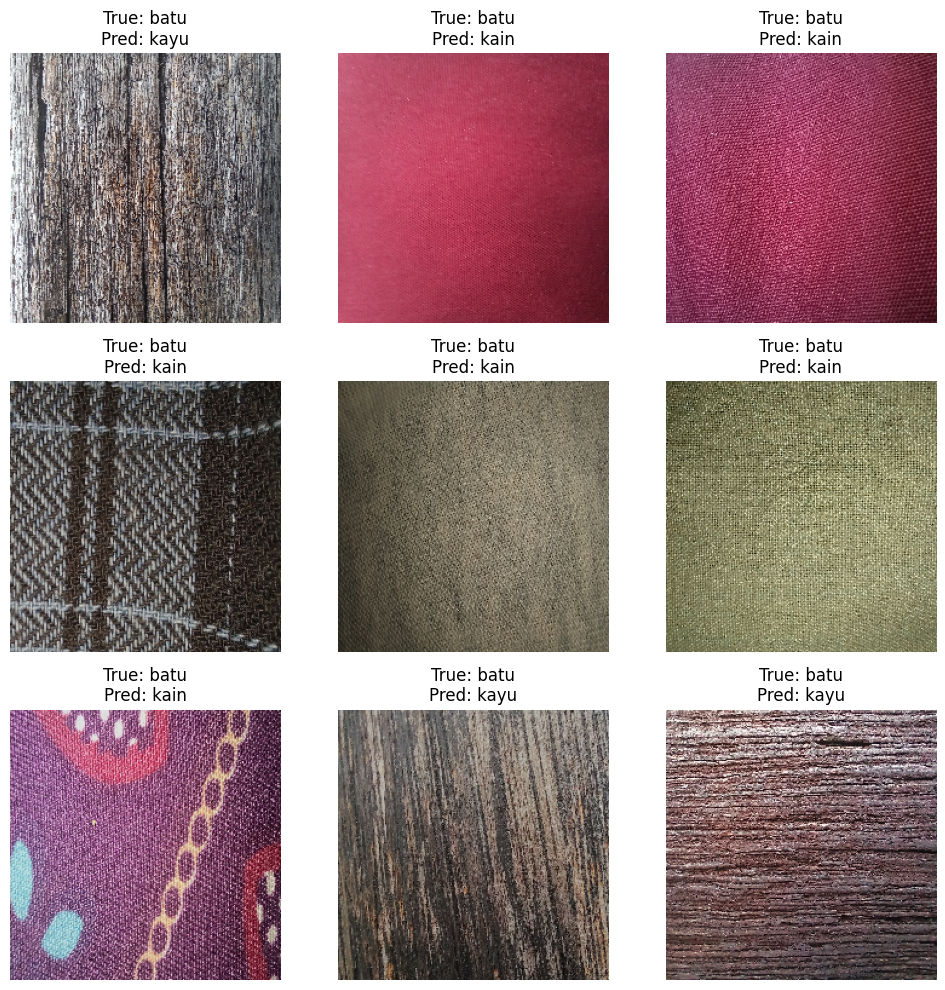

In [28]:
import numpy as np

# Get the true labels from the validation data
val_labels = val_data.classes
val_filenames = [val_data.filepaths[i] for i in val_data.index_array]

# Get the class names
class_names = list(val_data.class_indices.keys())

# Predict the classes for the validation data
predictions = best_model.predict(val_data)
predicted_classes = np.argmax(predictions, axis=1)

# Find misclassified images
misclassified_indices = np.where(predicted_classes != val_labels)[0]

print(f"Number of misclassified images: {len(misclassified_indices)}")

# You can now inspect the misclassified images and their predicted/true labels.
# For example, to see the first 5 misclassified images:
for i in misclassified_indices:
    print(f"Image: {val_filenames[i]}, True Label: {class_names[val_labels[i]]}, Predicted Label: {class_names[predicted_classes[i]]}")

# To display some of the misclassified images:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

plt.figure(figsize=(10, 10))
for i, misclassified_index in enumerate(misclassified_indices[:9]): # Display up to 9 misclassified images
    img_path = val_filenames[misclassified_index]
    true_label = class_names[val_labels[misclassified_index]]
    predicted_label = class_names[predicted_classes[misclassified_index]]

    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Rescale as done in ImageDataGenerator

    plt.subplot(3, 3, i + 1)
    plt.imshow(img_array)
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Save the trained model

In [30]:
# Save the best model
best_model.save('texture_model.keras')
print("Model saved successfully to 'texture_model.keras'")

Model saved successfully to 'texture_model.keras'


### Membuat GUI dengan framework Streamlit

In [14]:
# # Save the Streamlit code to a Python file
# streamlit_code = """
# import streamlit as st
# from PIL import Image
# import numpy as np
# import tensorflow as tf
# import os

# # Assuming img_size is (128, 128) and is consistent with training
# img_size = (128, 128)

# # Load the trained model
# @st.cache_resource
# def load_model():
#     # Adjust the path if your model file is in a different location
#     model_path = 'texture_model.keras'
#     if not os.path.exists(model_path):
#         st.error(f"Model file not found at {model_path}")
#         return None
#     return tf.keras.models.load_model(model_path)

# model = load_model()

# # Assuming class_names are ['batu', 'kain', 'kayu'] based on previous output
# # Make sure the order matches the model's output classes
# class_names = ['batu', 'kain', 'kayu'] # Replace with your actual class names in the correct order

# # Define a confidence threshold
# confidence_threshold = 0.7 # You can adjust this value (e.g., 0.7, 0.9)

# st.title("Aplikasi Pengenalan Tekstur")

# uploaded_file = st.file_uploader("Unggah gambar tekstur...", type=["jpg", "jpeg", "png"])

# if uploaded_file is not None:
#     # Display the uploaded image
#     image = Image.open(uploaded_file)
#     st.image(image, caption='Gambar yang Diunggah', use_container_width=True)

#     if model is not None:
#         # Preprocess the image and make prediction
#         img_array = np.array(image.resize(img_size)) / 255.0
#         img_array = np.expand_dims(img_array, axis=0)

#         predictions = model.predict(img_array)
#         predicted_class_index = np.argmax(predictions)
#         confidence = np.max(predictions) # Get the highest probability

#         st.write(f"Keyakinan Prediksi Tertinggi: {confidence:.4f}") # Display confidence

#         if confidence >= confidence_threshold:
#             if 0 <= predicted_class_index < len(class_names):
#                  predicted_class_name = class_names[predicted_class_index]
#                  st.write(f"Prediksi Tekstur: **{predicted_class_name}**")
#             else:
#                  st.warning("Model output out of expected range.")
#                  st.write(f"Predicted class index: {predicted_class_index}")
#         else:
#             st.write("Tekstur tidak dikenali (di bawah ambang batas keyakinan).")


#     else:
#         st.warning("Model could not be loaded.")

# """

# with open("app.py", "w") as f:
#     f.write(streamlit_code)

# print("Streamlit code saved to app.py")

In [15]:
# # Install localtunnel to expose the Streamlit app
# !npm install -g localtunnel

# # Run the Streamlit app in the background and expose it with localtunnel
# !streamlit run app.py & npx localtunnel --port 8501 & curl https://loca.lt/mytunnelpassword

### Aplikasi Streamlit dengan Deteksi OOD

Sel ini berisi kode untuk aplikasi Streamlit yang diperbarui. Aplikasi ini sekarang akan memuat model yang telah dilatih dan, saat pengguna mengunggah gambar, akan melakukan prediksi. Selain itu, aplikasi akan memeriksa apakah keyakinan prediksi tertinggi berada di bawah ambang batas OOD yang ditentukan. Jika ya, gambar akan ditandai sebagai Out-of-Distribution; jika tidak, gambar akan diklasifikasikan ke dalam salah satu kelas tekstur yang dikenali.

In [43]:
# Save the Streamlit code to a Python file with OOD detection
streamlit_code_ood = """
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf
import os

img_size = (224, 224)

# Load the trained model
@st.cache_resource
def load_model():
    # Adjust the path if your model file is in a different location
    model_path = 'texture_model.keras'
    if not os.path.exists(model_path):
        st.error(f"Model file not found at {model_path}")
        return None
    try:
        model = tf.keras.models.load_model(model_path)
        # Ensure the base model layers are not trainable for prediction
        for layer in model.layers[0].layers: # Assuming base_model is the first layer in Sequential
             layer.trainable = False
        return model
    except Exception as e:
        st.error(f"Error loading model: {e}")
        return None


model = load_model()

# Assuming class_names are ['batu', 'kain', 'kayu'] based on previous output
# Make sure the order matches the model's output classes
class_names = ['batu', 'kain', 'kayu'] # Replace with your actual class names in the correct order

# Define a confidence threshold for OOD detection
# Images with a highest predicted probability below this threshold will be considered OOD
ood_threshold = 0.9 # You can adjust this value based on your validation results

st.title("Aplikasi Pengenalan Tekstur dengan Deteksi OOD")

uploaded_file = st.file_uploader("Unggah gambar tekstur...", type=["jpg", "jpeg"])

if uploaded_file is not None:
    # Display the uploaded image
    image = Image.open(uploaded_file)
    st.image(image, caption='Gambar yang Diunggah', use_container_width=True)

    if model is not None:
        # Preprocess the image and make prediction
        img_array = np.array(image.resize(img_size)) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions)
        confidence = np.max(predictions) # Get the highest probability

        st.write(f"Keyakinan Prediksi Tertinggi: {confidence:.4f}") # Display confidence

        # Check for OOD based on the threshold
        if confidence < ood_threshold:
            st.write("Status: **Out-of-Distribution (OOD)**")
            st.write("Gambar ini mungkin bukan salah satu tekstur yang dikenali (batu, kain, kayu).")
        else:
            st.write("Status: **In-Distribution (ID)**")
            if 0 <= predicted_class_index < len(class_names):
                 predicted_class_name = class_names[predicted_class_index]
                 st.write(f"Prediksi Tekstur: **{predicted_class_name}**")
            else:
                 st.warning("Model output out of expected range.")
                 st.write(f"Predicted class index: {predicted_class_index}")

    else:
        st.warning("Model tidak dapat dimuat.")

"""

with open("app.py", "w") as f:
    f.write(streamlit_code_ood)

print("Streamlit code with OOD detection saved to app.py")

Streamlit code with OOD detection saved to app.py


### Menjalankan Aplikasi Streamlit dengan Deteksi OOD

Sel ini akan menginstal `localtunnel` jika belum terinstal dan kemudian menjalankan aplikasi Streamlit (`app.py`) di background. `localtunnel` akan membuat URL publik yang dapat Anda gunakan untuk mengakses aplikasi Streamlit dari browser web Anda.

In [36]:
streamlit run app.py

SyntaxError: invalid syntax (3737097518.py, line 1)